#### 查看代码运行时间 
%time #一次运行时间  
%timeit #多次运行平均耗时  
%%time和%%timeit可以运行多行代码  

查看文档shift+tab

单元格操作：  
前提：单元格处以选中状态  
1.新增单元：按B单元格下方新增  
         按A单元格上方新增  
2.删除单元格：双击D   
3.剪切单元格 按X  
4.复制单元格 按C  
5.粘贴单元格 按V  
6.撤销单元格 按Z  

cell 单元格  
两个状态：  
选中-->编辑  按下ESC  
编辑-->选中  按下Enter  

单元格模式：  
code 编码模式 运行：ctrl+enter  
makedowm 文本模式  
两个模式的切换：按下M切换markdowm  
           按下Y切换code  

In [ ]:
num1 = int.from_bytes(b'\xff' * 2, byteorder = 'big')
num2 = int.from_bytes(b'\xff' * 4, byteorder = 'little')
 
print('(%s,'%'num1', num1, ')\n', '(%s,'%'num2', num2, ')')
 
byt1 = (1024).to_bytes(2, byteorder = 'big')   # 100 0000 0000
byt2 = (1024).to_bytes(3, byteorder = 'big')
byt3 = (1024).to_bytes(4, byteorder = 'big')
byt4 = (1024).to_bytes(4, byteorder = 'little')
lis1 = ['byt1', 'byt2', 'byt3', 'byt4']
lis2 = [byt1, byt2, byt3, byt4]
lis3 = zip(lis1, lis2)
dic = dict(lis3)
 
print(dic)

In [9]:
print((int(0x00000004).to_bytes(4,byteorder= "big")))

b'\x00\x00\x00\x04'


## Python网络编程之Socket通信简单实现
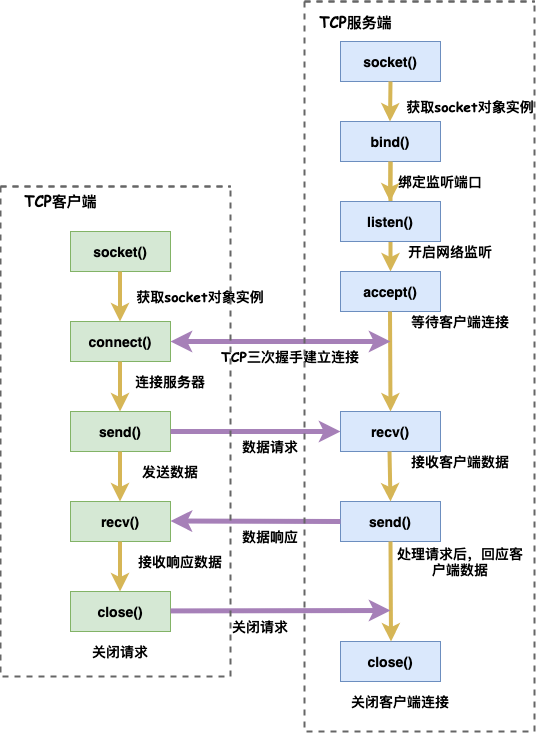

客户端流程

初始化socket()
使用ip和端口号connect()连接服务器
使用recv()接收数据，send()发送数据与服务器进行交互
关闭socket()

服务端流程

初始化socket()
使用bind()绑定ip和端口号
使用listen()监听消息
获取客户端的套接字地址accept()
使用recv()接收数据，send()发送数据与客户端进行交互
关闭socket()

在Python中使用socket.socket类即可实现TCP程序开发socket.socket(AddressFamily, Type)

参数说明:

AddressFamily 表示IP地址类型, 分为TPv4和IPv6
Type 表示传输协议类型
常用方法如下：

|方法|	描述|
| :-- | :------- |
|# 服务器端方法	||
|s.bind()	|绑定地址（host,port）到套接字，在AF_INET下,以元组（host,port）的形式表示地址。|
|s.listen(backlog)|	开始监听。backlog指定在拒绝连接之前，操作系统可以挂起的最大连接数量。该值至少为1，大部分应用程序设为5就可以了。|
|s.accept()	|被动接受客户端连接,(阻塞式)等待连接的到来，并返回（conn,address）二元元组,其中conn是一个通信对象，可以用来接收和发送数据。address是连接客户端的地址。|
|# 客户端方法	|
|s.connect(address)|	客户端向服务端发起连接。一般address的格式为元组（hostname,port），如果连接出错，返回socket.error错误。|
|s.connect_ex()|	connect()函数的扩展版本,出错时返回出错码,而不是抛出异常|
|# 公共方法|	|
|s.recv(bufsize)|	接收数据，数据以bytes类型返回，bufsize指定要接收的最大数据量。|
|s.send()|发送数据。返回值是要发送的字节数量。|
|s.sendall()|	完整发送数据。将数据发送到连接的套接字，但在返回之前会尝试发送所有数据。成功返回None，失败则抛出异常。|
|s.recvform()|	接收UDP数据，与recv()类似，但返回值是（data,address）。其中data是包含接收的数据，address是发送数据的套接字地址。|
|s.sendto(data,address)|	发送UDP数据，将数据data发送到套接字，address是形式为（ipaddr，port）的元组，指定远程地址。返回值是发送的字节数。
|s.close()||	关闭套接字，必须执行。
|s.getpeername()|	返回连接套接字的远程地址。返回值通常是元组（ipaddr,port）。|
|s.getsockname()|返回套接字自己的地址。通常是一个元组(ipaddr,port)|
|s.setsockopt(level,optname,value)	|设置给定套接字选项的值。|
|s.getsockopt(level,optname[.buflen])	|返回套接字选项的值。|
|s.settimeout(timeout)	|设置套接字操作的超时期，timeout是一个浮点数，单位是秒。值为None表示没有超时期。一般，超时期应该在刚创建套接字时设置，因为它们可能用于连接的操作（如connect()）|
|s.gettimeout()	|返回当前超时期的值，单位是秒，如果没有设置超时期，则返回None。|
|s.fileno()	返回套接字的文件描述符。|
|s.setblocking(flag)|如果flag为0，则将套接字设为非阻塞模式，否则将套接字设为阻塞模式（默认值）。非阻塞模式下，如果调用recv()没有发现任何数据，或send()调用无法立即发送数据，那么将引起socket.error异常。|
|s.makefile()|	创建一个与该套接字相关连的文件|

在Python中，import socket后，用socket.socket()方法来创建套接字，语法格式如下：

sk = socket.socket([family[, type[, proto]]])

参数说明：

- family: 套接字家族，可以使AF_UNIX或者AF_INET。
- type: 套接字类型，根据是面向连接的还是非连接分为SOCK_STREAM或SOCK_DGRAM，也就是TCP和UDP的区别。
- protocol: 一般不填默认为0。

直接socket.socket()，则全部使用默认值。

|socket类型|	描述|
| :---- | :---- |
|socket.AF_UNIX|	只能够用于单一的Unix系统进程间通信|
|socket.AF_INET|	IPv4|
|socket.AF_INET6|	IPv6|
|socket.SOCK_STREAM|	流式socket , for TCP|
|socket.SOCK_DGRAM	|数据报式socket , for UDP|
|socket.SOCK_RAW	|原始套接字，普通的套接字无法处理ICMP、IGMP等网络报文，而SOCK_RAW可以；其次，SOCK_RAW也可以处理特殊的IPv4报文；此外，利用原始套接字，可以通过IP_HDRINCL套接字选项由用户构造IP头。|
socket.SOCK_SEQPACKET	|可靠的连续数据包服务|
|创建TCP Socket：|	s=socket.socket(socket.AF_INET,socket.SOCK_STREAM)|
|创建UDP Socket：|	s=socket.socket(socket.AF_INET,socket.SOCK_DGRAM)|

### socket编程思路：
#### 服务端：

    创建套接字，绑定套接字到本地IP与端口：socket.socket(socket.AF_INET,socket.SOCK_STREAM) , s.bind()
    开始监听连接：s.listen()
    进入循环，不断接受客户端的连接请求：s.accept()
    接收传来的数据，或者发送数据给对方：s.recv() , s.sendall()
    传输完毕后，关闭套接字：s.close()
#### 客户端:

    创建套接字，连接服务器地址：socket.socket(socket.AF_INET,socket.SOCK_STREAM) , s.connect()
    连接后发送数据和接收数据：s.sendall(), s.recv()
    传输完毕后，关闭套接字：s.close()
    Python的socket编程，通常可分为TCP和UDP编程两种，前者是带连接的可靠传输服务，每次通信都要握手，结束传输也要挥手，数据会被检验，是使用最广的通用模式；后者是不带连接的传输服务，简单粗暴，不加控制和检查的一股脑将数据发送出去的方式，但是传输速度快，通常用于安全和可靠等级不高的业务场景，比如文件下载。

### TCP编程
#### 服务器端：

In [ ]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-

import socket

ip_port = ('192.168.188.1', 9999)

sk = socket.socket()            # 创建套接字
sk.bind(ip_port)                # 绑定服务地址
sk.listen(5)                    # 监听连接请求
print('启动socket服务，等待客户端连接...')
conn, address = sk.accept()     # 等待连接，此处自动阻塞
while True:     # 一个死循环，直到客户端发送‘exit’的信号，才关闭连接
    client_data = conn.recv(1024).decode()      # 接收信息
    if client_data == "exit":       # 判断是否退出连接
        exit("通信结束")
    print("来自%s的客户端向你发来信息：%s" % (address, client_data))
    conn.sendall('服务器已经收到你的信息'.encode())    # 回馈信息给客户端
conn.close()    # 关闭连接

#### 客户端:

In [ ]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-

import socket

ip_port = ('192.168.188.1', 9999)

s = socket.socket()     # 创建套接字

s.connect(ip_port)      # 连接服务器

while True:     # 通过一个死循环不断接收用户输入，并发送给服务器
    inp = input("请输入要发送的信息： ").strip()
    if not inp:     # 防止输入空信息，导致异常退出
        continue
    s.sendall(inp.encode())

    if inp == "exit":   # 如果输入的是‘exit’，表示断开连接
        print("结束通信！")
        break

    server_reply = s.recv(1024).decode()
    print(server_reply)

s.close()       # 关闭连接

下面我们使用Python内置的threading模块，配合socket模块创建多线程服务器。客户端的代码不需要修改，可以继续使用。

In [ ]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-

import socket
import threading        # 导入线程模块


def link_handler(link, client):     
    """
    该函数为线程需要执行的函数，负责具体的服务器和客户端之间的通信工作
    :param link: 当前线程处理的连接
    :param client: 客户端ip和端口信息，一个二元元组
    :return: None
    """
    print("服务器开始接收来自[%s:%s]的请求...." % (client[0], client[1]))
    while True:     # 利用一个死循环，保持和客户端的通信状态
        client_data = link.recv(1024).decode()
        if client_data == "exit":
            print("结束与[%s:%s]的通信..." % (client[0], client[1]))
            break
        print("来自[%s:%s]的客户端向你发来信息：%s" % (client[0], client[1], client_data))
        link.sendall('服务器已经收到你的信息'.encode())
    link.close()


ip_port = ('127.0.0.1', 9999)
sk = socket.socket()            # 创建套接字
sk.bind(ip_port)                # 绑定服务地址
sk.listen(5)                    # 监听连接请求

print('启动socket服务，等待客户端连接...')

while True:     # 一个死循环，不断的接受客户端发来的连接请求
    conn, address = sk.accept()  # 等待连接，此处自动阻塞
    # 每当有新的连接过来，自动创建一个新的线程，
    # 并将连接对象和访问者的ip信息作为参数传递给线程的执行函数
    t = threading.Thread(target=link_handler, args=(conn, address))
    t.start()


启动这个多线程服务器，然后多运行几个客户端，可以很明显地看到，服务器能够同时与多个客户端通信，基本达到我们的目的。